In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('../Data/df_transformed.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
df.columns

Index(['LBXTC', 'RIAGENDR', 'RIDRETH3', 'RIDAGEYR', 'BMXWT', 'BMXHT', 'BMXBMI',
       'BPXPLS', 'BPXPULS', 'DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR',
       'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL',
       'DR1TSODI', 'DR1TVD', 'DR1TCALC', 'DR1TIRON', 'DR1TPOTA', 'DR1_300',
       'ALQ120Q', 'ALQ120U', 'ALQ130', 'BPQ020', 'BPQ050A', 'BPQ080',
       'BPQ100D', 'DIQ010', 'MCQ170M', 'SMQ681', 'PAQ610', 'PAD615', 'PAQ625',
       'PAD630', 'PAQ655', 'PAD660', 'PAQ670', 'PAD675', 'Systolic',
       'Diastolic', 'outlier', 'MET_work', 'MET_rec', 'DR1TKCAL_t',
       'DR1TPROT_t', 'DR1TCARB_t', 'DR1TSUGR_t', 'DR1TFIBE_t', 'DR1TTFAT_t',
       'DR1TSFAT_t', 'DR1TMFAT_t', 'DR1TPFAT_t', 'DR1TCHOL_t', 'DR1TSODI_t',
       'DR1TVD_t', 'DR1TCALC_t', 'DR1TIRON_t', 'DR1TPOTA_t', 'avgALC',
       'log_LBXTC'],
      dtype='object')

In [4]:

cat_variables = ['RIAGENDR','RIDRETH3','ALQ120U','BPQ020', 'BPQ050A', 'BPQ080',
       'BPQ100D', 'DIQ010', 'MCQ170M', 'SMQ681']
numeric_variables = ['RIDAGEYR','BMXWT', 'BMXHT','BPXPLS','Systolic',
       'Diastolic', 'ALQ120Q','ALQ130', 'MET_rec', 'DR1TKCAL_t',
       'DR1TPROT_t', 'DR1TCARB_t', 'DR1TSUGR_t', 'DR1TFIBE_t', 'DR1TTFAT_t',
       'DR1TSFAT_t', 'DR1TMFAT_t', 'DR1TPFAT_t', 'DR1TCHOL_t', 'DR1TSODI_t',
       'DR1TVD_t', 'DR1TCALC_t', 'DR1TIRON_t', 'DR1TPOTA_t']
df2 = df[cat_variables+numeric_variables+['LBXTC']].copy()
df2.dropna(inplace=True)
df2.shape

(3551, 35)

In [5]:
y = df2['LBXTC']
X = df2.drop('LBXTC',axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=675, test_size=0.2)

In [7]:
def build_model():
    model = Sequential([
        Dense(1024, activation='relu'),
        Dropout(0.3),
        BatchNormalization(),
        Dense(1024, activation='relu'),
        Dropout(0.3),
        BatchNormalization(),
        Dense(1024, activation='relu'),
        Dropout(0.3),
        BatchNormalization(),
        Dense(1),
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [8]:
numeric_transformer = Pipeline(steps=[('scalar',StandardScaler())])
cat_transformer = Pipeline(steps=[('one_hot',OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[
    ('num',numeric_transformer,numeric_variables),
    ('cat',cat_transformer,cat_variables)])
pipeline = Pipeline(steps=[('preprocessor',preprocessor),
                          ('mlp', KerasRegressor(build_fn=build_model, epochs=25, batch_size=5, verbose=2))])

In [9]:
pipeline.fit(X_train,y_train)

Epoch 1/25
568/568 - 5s - loss: 15128.2207
Epoch 2/25
568/568 - 4s - loss: 1799.6810
Epoch 3/25
568/568 - 4s - loss: 1729.1978
Epoch 4/25
568/568 - 4s - loss: 1694.2507
Epoch 5/25
568/568 - 4s - loss: 1649.7734
Epoch 6/25
568/568 - 4s - loss: 1666.9081
Epoch 7/25
568/568 - 4s - loss: 1630.9271
Epoch 8/25
568/568 - 4s - loss: 1664.0159
Epoch 9/25
568/568 - 4s - loss: 1647.9727
Epoch 10/25
568/568 - 4s - loss: 1605.2579
Epoch 11/25
568/568 - 4s - loss: 1592.0917
Epoch 12/25
568/568 - 4s - loss: 1613.2173
Epoch 13/25
568/568 - 5s - loss: 1574.5139
Epoch 14/25
568/568 - 5s - loss: 1571.1738
Epoch 15/25
568/568 - 6s - loss: 1527.2898
Epoch 16/25
568/568 - 4s - loss: 1571.2850
Epoch 17/25
568/568 - 4s - loss: 1568.2225
Epoch 18/25
568/568 - 5s - loss: 1561.6769
Epoch 19/25
568/568 - 5s - loss: 1557.8893
Epoch 20/25
568/568 - 5s - loss: 1569.9408
Epoch 21/25
568/568 - 5s - loss: 1540.2230
Epoch 22/25
568/568 - 5s - loss: 1572.1735
Epoch 23/25
568/568 - 5s - loss: 1552.4351
Epoch 24/25
568/568

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  ['RIDAGEYR', 'BMXWT', 'BMXHT',
                                                   'BPXPLS', 'Systolic',
                                                   'Diastolic', 'ALQ120Q',
                                                   'ALQ130', 'MET_rec',
                                                   'DR1TKCAL_t', 'DR1TPROT_t',
                                                   'DR1TCARB_t', 'DR1TSUGR_t',
                                                   'DR1TFIBE_t', 'DR1TTFAT_t',
                                                   'DR1TSFAT_t', 'DR1TMFAT_t',
                                                   'DR1TPFAT_t', 'DR1TCHOL_t',
                                                 

In [10]:
y_preds = pipeline.predict(X_train)

568/568 - 1s


In [11]:
 r2_score(y_train,y_preds)

-0.10581282888256327

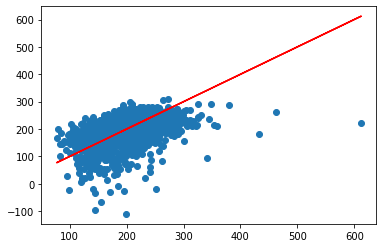

In [12]:
plt.scatter(y_train, y_preds)
plt.plot(y_train, y_train, color="red")